# 1 - Import Packages

In [139]:
# Import packages
### YOUR CODE HERE ###

# For data manipulation
import numpy as np 
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest


# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

In [72]:
df = pd.read_csv('C:\Minhtri\ProjectDA\HR\HR_comma_sep.csv')

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\ACER\AppData\Local\Temp\ipykernel_73464\2316846196.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('C:\Minhtri\ProjectDA\HR\HR_comma_sep.csv')


In [73]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# 2.EDA
## 2.1. Overview

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [75]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


- Satisfaction_level: average - 61%, min - 9%
- last_evaluation: average - 71%, min - 36%
- number_project: average - 4 projects, min - 2 projects
- average_montly_hours: average - 201 hours/month, min - 96 hours/month (workday 2-6 | Average - 10.05 hours/day, 4.8 hours/day)
- time_spend_company: average - 3.5 years, min - 2 years
- Work_accident: average - 14%, min - 0%
- left: average - 24%, min - 0%
- promotion_last_5years: average - 2.1%, min - 0%

In [76]:
df.duplicated().sum()

np.int64(3008)

In [77]:
df1 = df.drop_duplicates()

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [79]:
df1.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [80]:
df1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

## 2.2 Check outliers

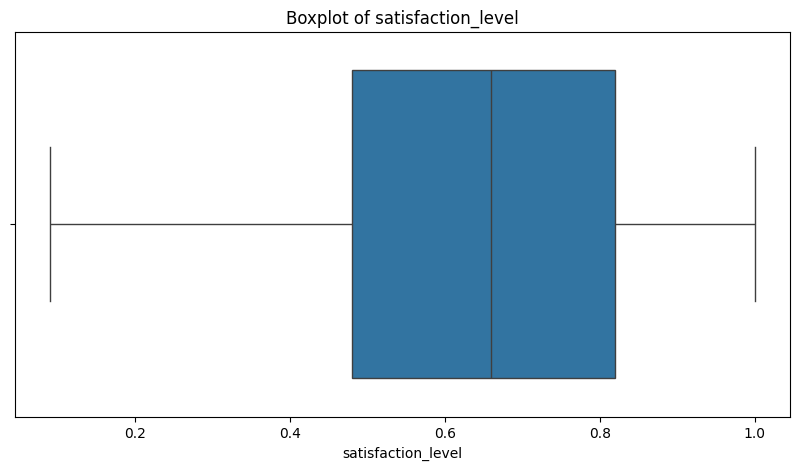

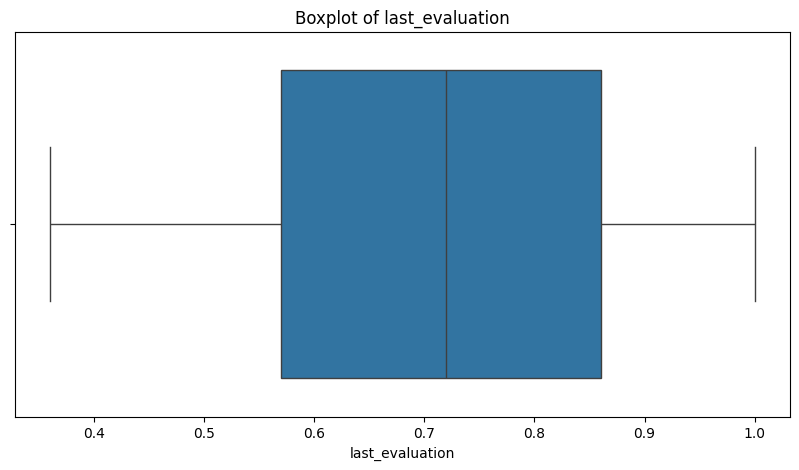

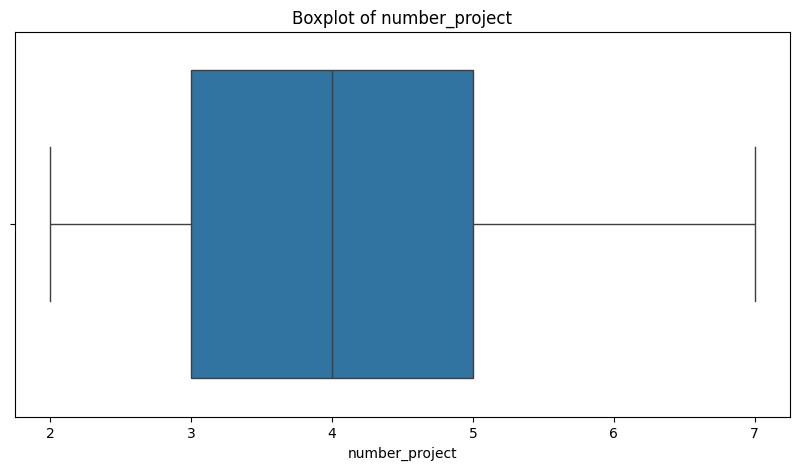

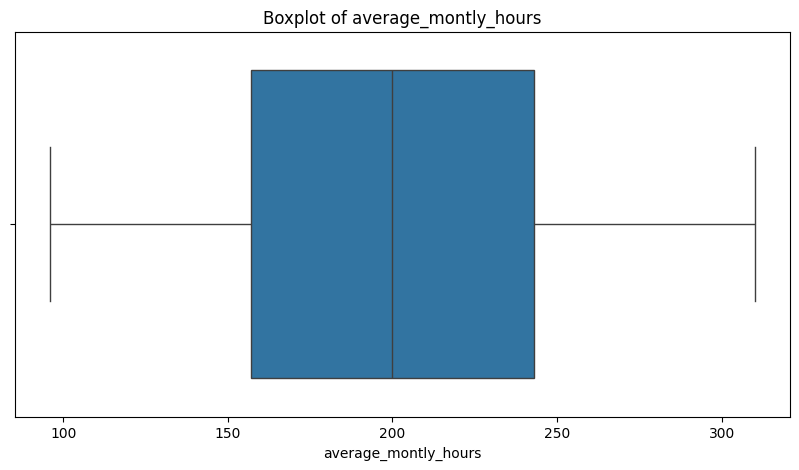

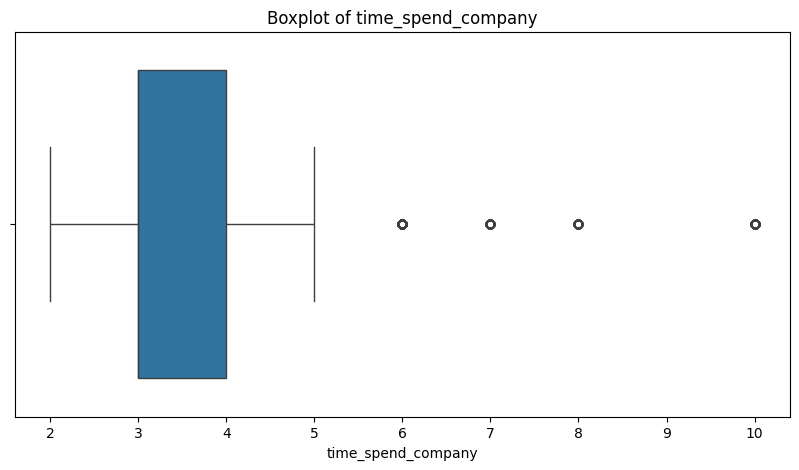

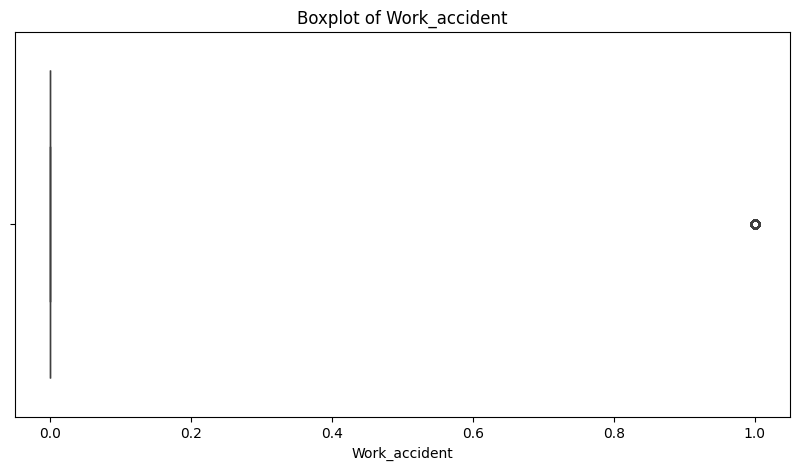

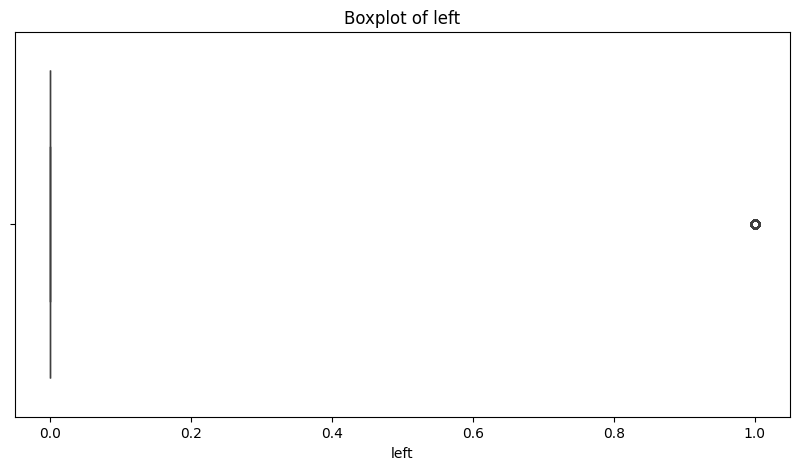

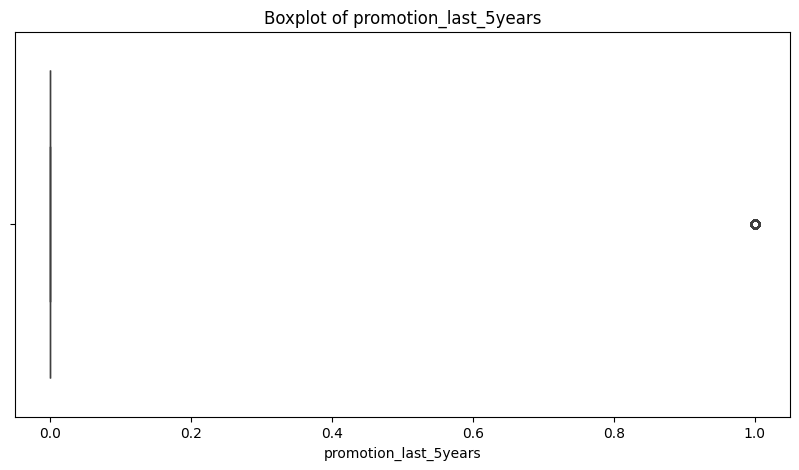

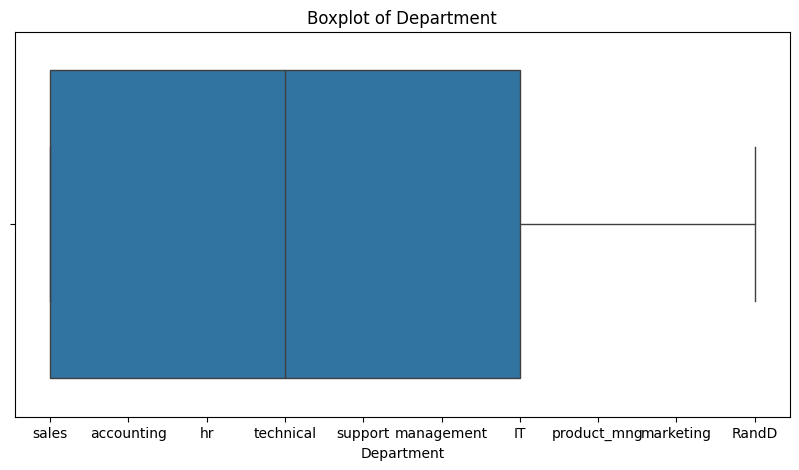

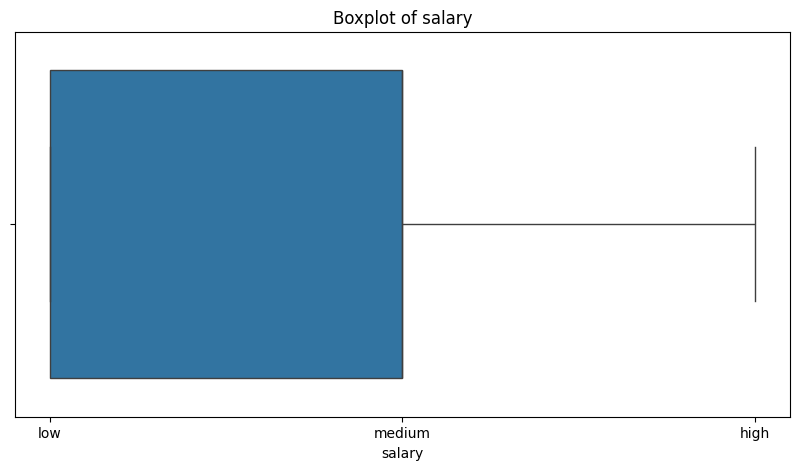

In [81]:
for i in df1.columns:
    plt.figure(figsize=(10, 5))
    ax = sns.boxplot(x=df1[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

There are 4 variables with outliers. check how ouliers impact to data

In [82]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [83]:
# check outliers of time_spend_company
sum(df1['time_spend_company'] > 5)*100/sum(df1['time_spend_company'])

2.0422325765837215

Outliers only 2.04%, so it doesn’t have a significant impact on the data.   

## 2.3. Detail EDA

### 2.3.1 Checking the 'Department' and 'Left' Variables

In [84]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [85]:
# Check numbers of employee for each department
df1['Department'].value_counts()

Department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

In [86]:
# check percentage of employee for each department
df1['Department'].value_counts(normalize=True)*100

Department
sales          27.011926
technical      18.714036
support        15.186390
IT              8.139438
RandD           5.787674
product_mng     5.720957
marketing       5.612543
accounting      5.178884
hr              5.012092
management      3.636060
Name: proportion, dtype: float64

In [87]:
# Check numbers of employee for each salary level
df1['salary'].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

In [88]:
#check percentage of employee for each salary level
df1['salary'].value_counts(normalize=True)*100

salary
low       47.869235
medium    43.874573
high       8.256192
Name: proportion, dtype: float64

In [89]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [90]:
# check numbers of employee who left the company (0 - stay, 1 - left)
df1['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

In [91]:
# Check which departments have the highest retention rate.
df1.groupby('Department')['left'].value_counts(normalize=True)*100

Department   left
IT           0       83.811475
             1       16.188525
RandD        0       87.752161
             1       12.247839
accounting   0       82.447665
             1       17.552335
hr           0       81.198003
             1       18.801997
management   0       88.073394
             1       11.926606
marketing    0       83.358098
             1       16.641902
product_mng  0       83.965015
             1       16.034985
sales        0       83.019450
             1       16.980550
support      0       82.866557
             1       17.133443
technical    0       82.620321
             1       17.379679
Name: proportion, dtype: float64

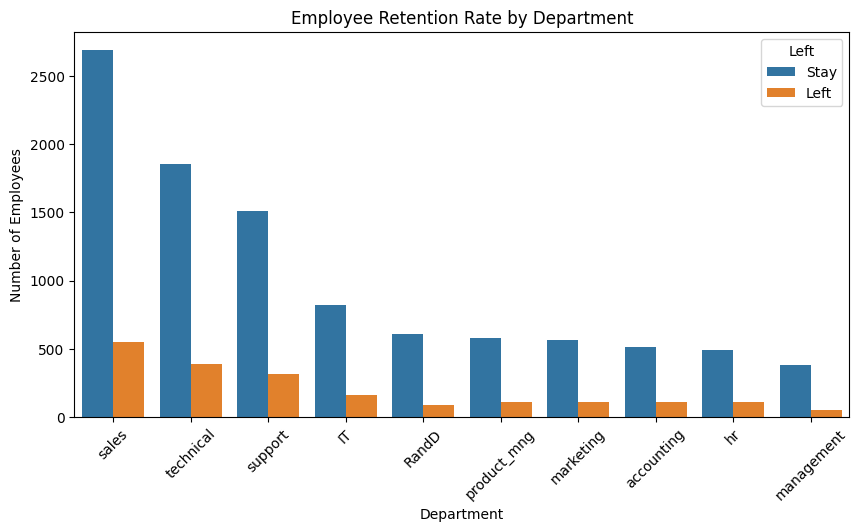

In [92]:
department_counts = df1['Department'].value_counts().index
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='Department', hue='left', data=df1,order=department_counts)
plt.xticks(rotation=45)
plt.title('Employee Retention Rate by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Left', loc='upper right', labels=['Stay','Left']);

3 departments have the highest attrition rate are: Sales, Technical, Support. Dig deeper into this to explain why

### 2.3.1.1 Checking the 'Department' and 'Salary' Variables to explain why 3 departments have the highest attrition rate

In [93]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Text(0, 0.5, 'Slary Level')

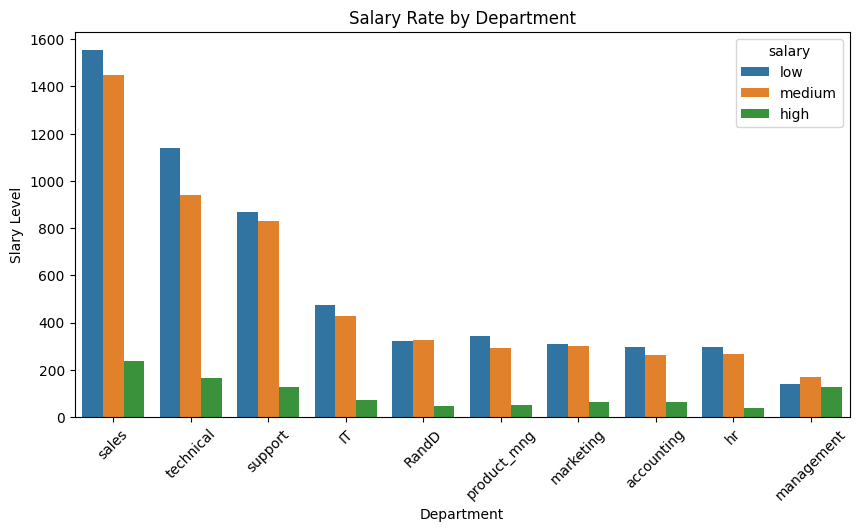

In [94]:
# Dig deeper into this to explain why 3 departments have the highest retention rate
# (sales, support, technical)
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='Department', hue='salary', data=df1, order=department_counts)
plt.xticks(rotation=45)
plt.title('Salary Rate by Department')
plt.xlabel('Department')
plt.ylabel('Slary Level')

Check rate salary between 3 deparment 

In [95]:
# Check rate of employee who left the company by salary level
df1.groupby('salary')['left'].value_counts(normalize=True)*100

salary  left
high    0       95.151515
        1        4.848485
low     0       79.547038
        1       20.452962
medium  0       85.383007
        1       14.616993
Name: proportion, dtype: float64

As we can see,20% of all employees with low salaries and 14.6% of all employees with medium salaries left the company.

In [96]:
# Check rate of employee who left the company by salary level and department
# Step 1: Get department order based on frequency
department_counts = df1['Department'].value_counts().index

# Step 2: Get the salary distribution (percentages)
df_result = df1.groupby('Department')['salary'].value_counts(normalize=True) * 100

# Step 3: Reorder using sort_index with a key function
df_result = df_result.sort_index(level='Department', key=lambda x: x.map({dept: i for i, dept in enumerate(department_counts)}))

df_result = df_result.reset_index(name='percentage')
df_result

,Department,salary,percentage
0,sales,high,7.317073
1,sales,low,47.946897
2,sales,medium,44.736030
3,technical,high,7.397504
4,technical,low,50.713012
5,technical,medium,41.889483
6,support,high,6.919275
7,support,low,47.611203
8,support,medium,45.469522
9,IT,high,7.274590


In [97]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 2.3.1.2: Checking the 'Department' and 'Average_monthly_hours' Variables to explain why 3 departments have the highest attrition rate

In [98]:
average_montly_hours_sum = df1.groupby('Department')['average_montly_hours'].sum().astype(int)
average_montly_hours_sum

Department
IT             195823
RandD          139696
accounting     124745
hr             119822
management      87867
marketing      134255
product_mng    136441
sales          648584
support        365342
technical      451303
Name: average_montly_hours, dtype: int64

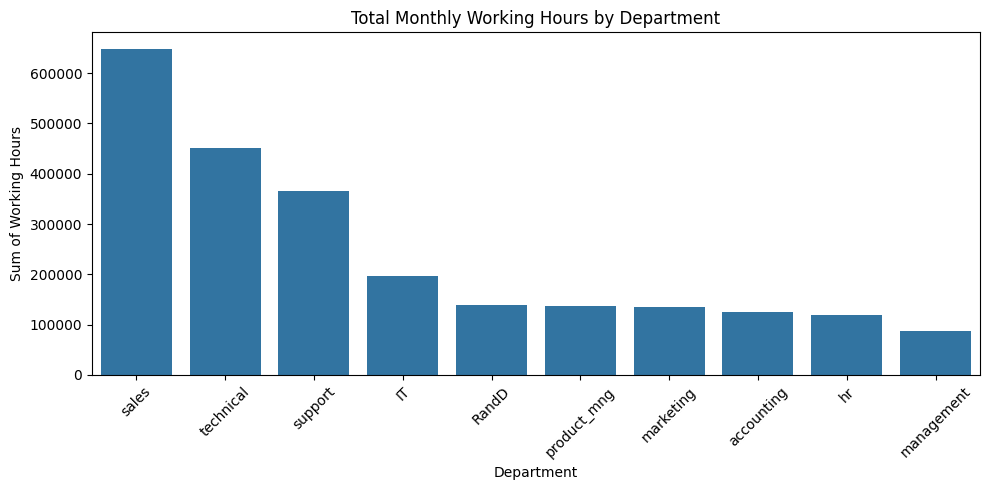

In [99]:
average_montly_hours_sum = df1.groupby('Department')['average_montly_hours'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=average_montly_hours_sum, x='Department', y='average_montly_hours', order=department_counts)
plt.xticks(rotation=45)
plt.title('Total Monthly Working Hours by Department')
plt.xlabel('Department')
plt.ylabel('Sum of Working Hours')
plt.tight_layout()
plt.show()

Employees in the Sales, Technical, and Support departments tend to work longer hours.

### 2.3.1.3: Checking the 'Department' and 'Promotion_last_5years' Variables to explain why 3 departments have the highest attrition rate

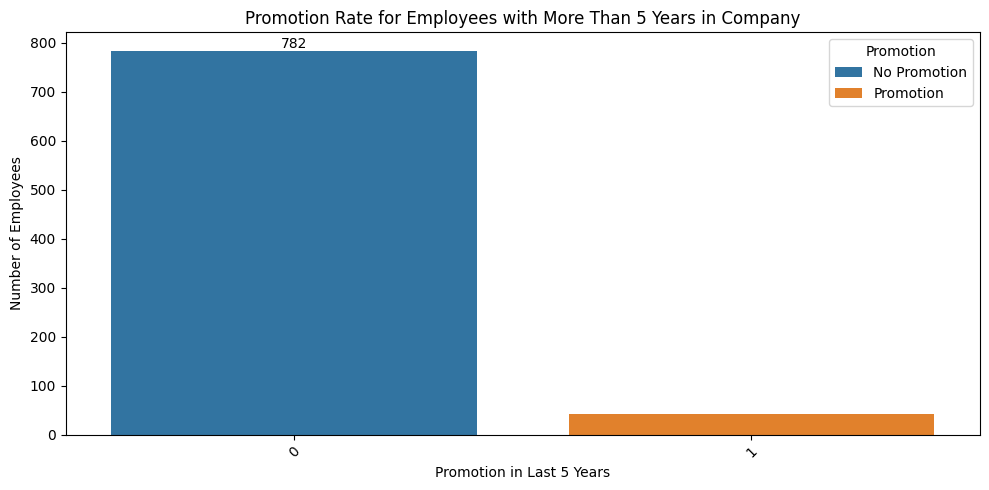

In [100]:
# Check ratio of time spent company > 5 years and promotion in last 5 years
# Step 1: Create a new DataFrame with the condition
df_condition = df1[df1['time_spend_company'] > 5]
# Step 2: Get the ratio of employees who received a promotion in the last 5 years
df_condition['promotion_last_5years'].value_counts(normalize=True)*100
# Step 3: Visualize the result
plt.figure(figsize=(10, 5))
sns.countplot(x='promotion_last_5years', hue= 'promotion_last_5years', data=df_condition)
plt.title('Promotion Rate for Employees with More Than 5 Years in Company')
plt.xlabel('Promotion in Last 5 Years')
plt.ylabel('Number of Employees')
plt.bar_label(plt.gca().containers[0])
plt.xticks(rotation=45)
plt.legend(title='Promotion', loc='upper right', labels=['No Promotion','Promotion'])
plt.tight_layout()
plt.show()


In [101]:
df_condition['promotion_last_5years'].value_counts().sum() # 0

np.int64(824)

In [102]:
df_condition['promotion_last_5years'].value_counts(normalize=True)*100 

promotion_last_5years
0    94.902913
1     5.097087
Name: proportion, dtype: float64

Among the 824 employees who have spent over 5 years at the company, only 5% have been promoted, while the remaining 95% have not received a promotion. This means 783 employess who have spent over 5 years and don't receive a promotion

In [103]:
df_condition.groupby('left')['promotion_last_5years'].mean()

left
0    0.058741
1    0.000000
Name: promotion_last_5years, dtype: float64

In [104]:
df_condition.groupby('promotion_last_5years')['left'].value_counts(normalize=True)*100


promotion_last_5years  left
0                      0        86.061381
                       1        13.938619
1                      0       100.000000
Name: proportion, dtype: float64


Among those not promoted, 14% left the company. This means that out of 783 employees who did not receive a promotion, 110 left the company."

Among those promoted, 100% stayed.

So this shows how promotion affects retention.

In [105]:
df1.groupby('Department')['number_project'].sum().astype(int).sort_values(ascending=False)

Department
sales          12234
technical       8660
support         6958
IT              3706
RandD           2672
product_mng     2603
marketing       2504
accounting      2381
hr              2209
management      1673
Name: number_project, dtype: int64

### 2.3.1.4 Checking the 'Department' and 'Number_project' Variables to explain why 3 departments have the highest attrition rate

In [106]:
# check ratio of employee who left the company by number of projects
df1.groupby('number_project')['left'].value_counts(normalize=True)*100

number_project  left
2               1        54.171934
                0        45.828066
3               0        98.920455
                1         1.079545
4               0        93.568521
                1         6.431479
5               0        84.639498
                1        15.360502
6               0        55.084746
                1        44.915254
7               1       100.000000
Name: proportion, dtype: float64

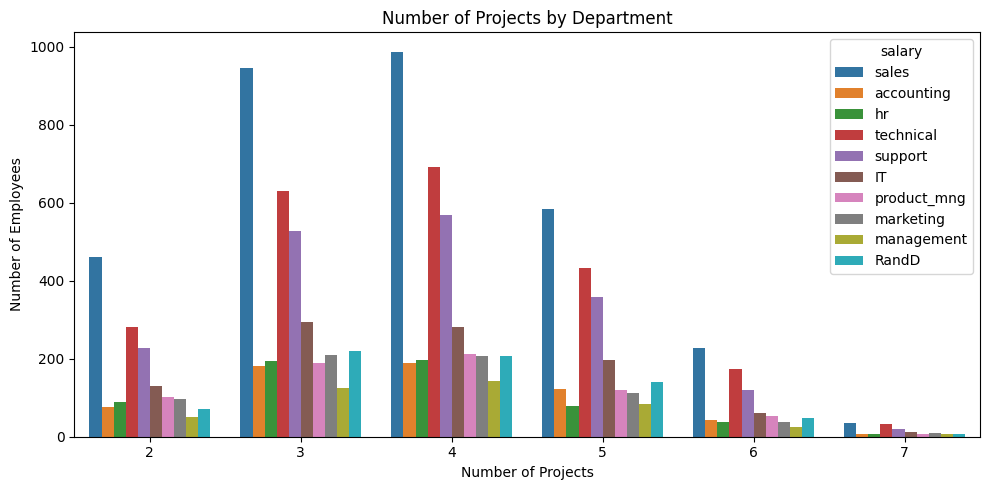

In [107]:
#visualize the result
plt.figure(figsize=(10, 5))
sns.countplot(x='number_project', hue='Department', data=df1)
plt.title('Number of Projects by Department')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.legend(title='salary', loc='upper right')
plt.tight_layout()
plt.show()

In [108]:
# calculate the percentage of the highest derpartment and the lowest department in the number of projects 
df1.groupby('number_project')[['Department']].value_counts()*100


number_project  Department 
2               sales          46000
                technical      28200
                support        22700
                IT             12900
                product_mng    10100
                marketing       9600
                hr              8800
                accounting      7700
                RandD           7100
                management      5100
3               sales          94500
                technical      63100
                support        52800
                IT             29500
                RandD          22100
                marketing      21000
                hr             19300
                product_mng    19000
                accounting     18200
                management     12500
4               sales          98800
                technical      69100
                support        56800
                IT             28200
                product_mng    21300
                marketing      20800
          

In [109]:
# Step 1: Group and get proportions (percentages)
dept_pct = df1.groupby('number_project')['Department'].value_counts(normalize=True) * 100

# Step 2: Convert to DataFrame and reset index
dept_pct = dept_pct.reset_index(name='percentage')

# Step 3: For each number_project, sort and get top 2 departments
top2 = dept_pct.groupby('number_project').apply(lambda x: x.nlargest(2, 'percentage')).reset_index(drop=True)

# Step 4: Pivot to make first and second percentages side by side
pivot_top2 = top2.groupby('number_project')['percentage'].apply(list).apply(pd.Series)
pivot_top2.columns = ['top1', 'top2']

# Step 5: Calculate ratio
pivot_top2['top1_top2_ratio'] = pivot_top2['top1'] - pivot_top2['top2']

pivot_top2['mean']= pivot_top2['top1_top2_ratio'].mean()
# Show the final result
print(pivot_top2)


                     top1       top2  top1_top2_ratio      mean
number_project                                                 
2               29.077118  17.825537        11.251580  7.144333
3               26.846591  17.926136         8.920455  7.144333
4               26.811398  18.751696         8.059701  7.144333
5               26.153157  19.435737         6.717421  7.144333
6               27.481840  20.944310         6.537530  7.144333
7               24.137931  22.758621         1.379310  7.144333


C:\Users\ACER\AppData\Local\Temp\ipykernel_73464\2275829514.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top2 = dept_pct.groupby('number_project').apply(lambda x: x.nlargest(2, 'percentage')).reset_index(drop=True)


in the top1_top2_ratio columns, we have 6 sample size for this. so i decide to calculate confidence intervals for this. Because i want to know the average the top1 is higher project than the top2.

In [110]:
# Sample size, mean, and standard deviation
n = len(pivot_top2['top1_top2_ratio'])
mean = np.mean(pivot_top2['top1_top2_ratio'])
std_dev = np.std(pivot_top2['top1_top2_ratio'], ddof=1)  # sample standard deviation (ddof=1)

# Degrees of freedom
d_f = n - 1

# t-critical value for 95% confidence, two-tailed
confidence = 0.95
t_critical = stats.t.ppf((1 + confidence) / 2, d_f)

# Margin of error
margin_of_error = t_critical * (std_dev / np.sqrt(n))

# Confidence interval
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

# Print the results
print(f"Sample mean: {mean:.4f}")
print(f"Standard deviation: {std_dev:.4f}")
print(f"t-critical value: {t_critical:.4f}")
print(f"Margin of error: {margin_of_error:.4f}")
print(f"95% Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

Sample mean: 7.1443
Standard deviation: 3.3060
t-critical value: 2.5706
Margin of error: 3.4694
95% Confidence Interval: (3.6749, 10.6138)



As the time that we can see spend is almost highest, the Sales department consistently has the highest number of projects. On average, the team with the most projects typically has between 3.67% and 10.61% more employees than the team ranked second. However, despite their heavy workload, the Sales team's salary remains relatively low

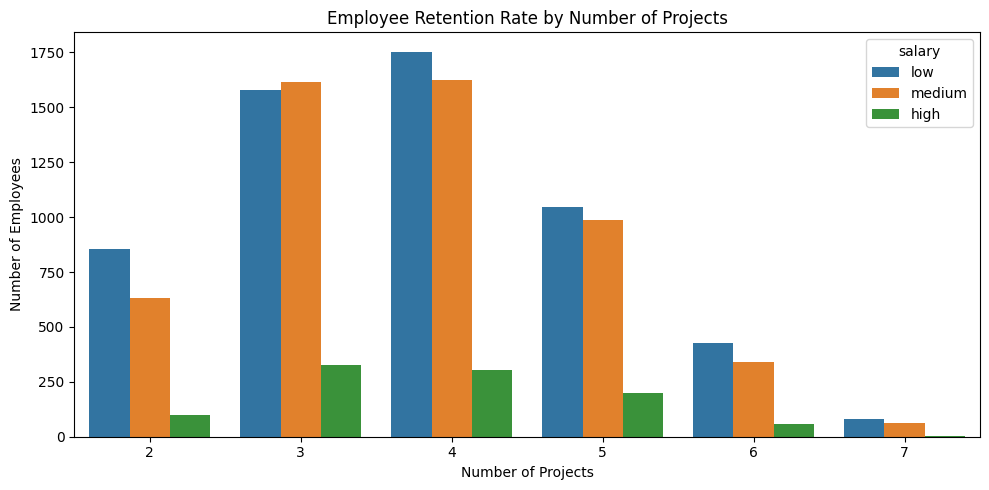

In [111]:
#visualize the result
plt.figure(figsize=(10, 5))
sns.countplot(x='number_project', hue='salary', data=df1)
plt.title('Employee Retention Rate by Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.legend(title='salary', loc='upper right', labels=['low','medium','high'])
plt.tight_layout()
plt.show()

In [112]:
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [113]:
df1[(df1['number_project'] > 5) & (df1['salary'] == 'medium')]


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2,0.11,0.88,7,272,4,0,1,0,sales,medium
61,0.11,0.93,7,308,4,0,1,0,IT,medium
62,0.10,0.95,6,244,5,0,1,0,IT,medium
64,0.11,0.94,6,286,4,0,1,0,IT,medium
65,0.81,0.70,6,161,4,0,1,0,IT,medium
...,...,...,...,...,...,...,...,...,...,...
11678,0.27,0.42,6,173,7,0,0,0,sales,medium
11722,0.16,0.95,6,117,7,0,0,0,sales,medium
11725,0.16,0.63,6,286,7,0,0,1,sales,medium
11828,0.42,0.96,6,173,3,0,0,0,sales,medium


In [114]:
# 1. Filter employees with more than 5 projects
df_high_projects = df[df['number_project'] > 5]

# 2. Group by salary and calculate total count and number of employees who left
summary = df_high_projects.groupby('salary').agg(
    total_employees=('left', 'count'),
    left_employees=('left', 'sum'),
    avg_time_spend=('time_spend_company', 'mean')
)

# 3. Calculate the percentage of employees who left
summary['left_percentage'] = (summary['left_employees'] / summary['total_employees']) * 100

# 4. Round results for better readability
summary = summary.round(2)

print(summary)


        total_employees  left_employees  avg_time_spend  left_percentage
salary                                                                  
high                 76              16            4.55            21.05
low                 777             549            4.09            70.66
medium              577             346            4.25            59.97


Employees with low salaries and more than 5 projects have a very high turnover (left rate) is 70.66%. These employees also spend avegare 4 years at the company, but still leave at a high rate → suggesting possible burnout or underpayment.

### 2.3.2 Checking the 'Satisfaction_level' and 'Left' Variables

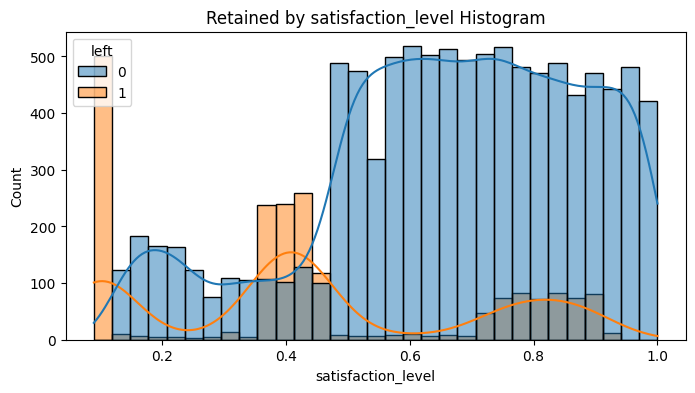

In [115]:

# Histogram
plt.figure(figsize=(8,4))
sns.histplot(data=df1,x='satisfaction_level', hue='left', kde=True)
plt.title('Retained by satisfaction_level Histogram')
plt.show()

Satisfaction_level is lower, Employees tend to left the company

### 2.3.3 Checking the 'Last_evaluation' and 'Left' Variables

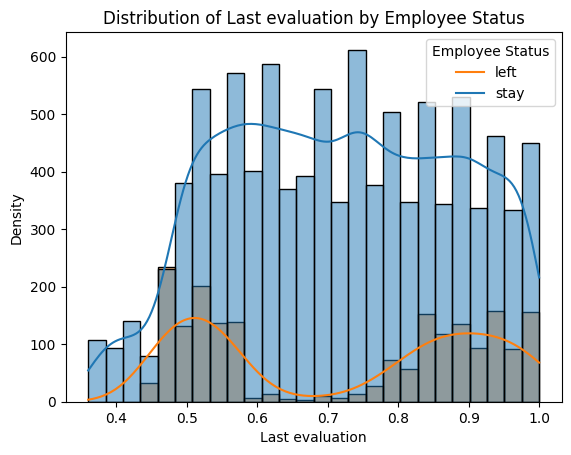

In [116]:
plt.Figure(figsize=(10, 5))
sns.histplot(data=df1, x='last_evaluation', hue='left', kde=True)
plt.title('Distribution of Last evaluation by Employee Status')
plt.xlabel('Last evaluation')
plt.ylabel('Density')
plt.legend(title='Employee Status', loc='upper right', labels=['left','stay'])
plt.show()

Last evaluation is lower than 0.6 make employees tend to left the company

But why Last evaluation is greater than 0.8 still make employees tend to left the company ? let's dig deeper

In [117]:
df_high_eval = df1[df1['last_evaluation'] > 0.8]

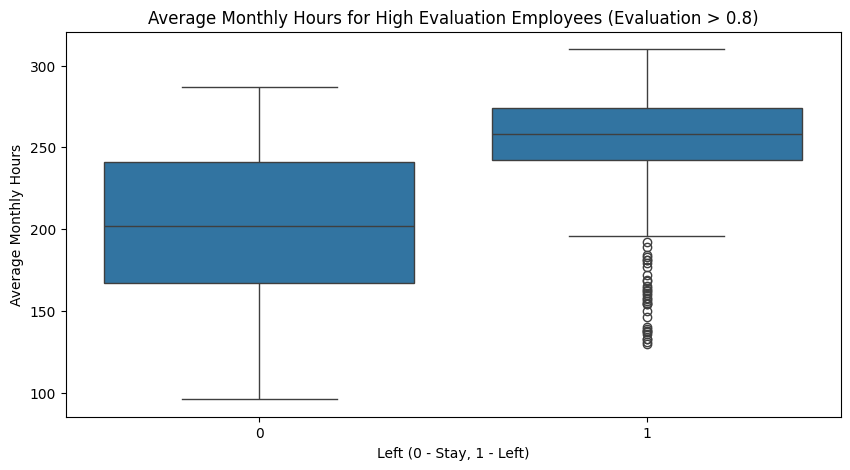

In [118]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_high_eval, x='left', y='average_montly_hours')
plt.title('Average Monthly Hours for High Evaluation Employees (Evaluation > 0.8)')
plt.xlabel('Left (0 - Stay, 1 - Left)')
plt.ylabel('Average Monthly Hours')
plt.show()

High evaluation employees who left the company tended to work more hours per month compared to those who stayed.

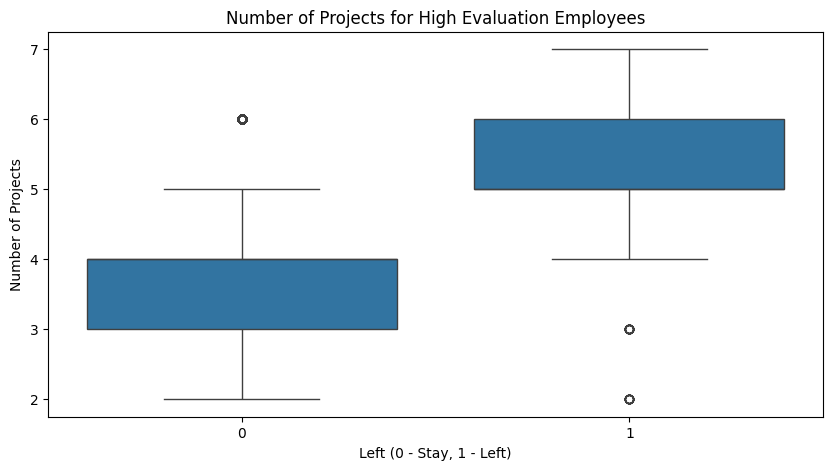

In [119]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_high_eval, x='left', y='number_project')
plt.title('Number of Projects for High Evaluation Employees')
plt.xlabel('Left (0 - Stay, 1 - Left)')
plt.ylabel('Number of Projects')
plt.show()

High evaluation employees who left the company tended to work more projects compared to those who stayed.

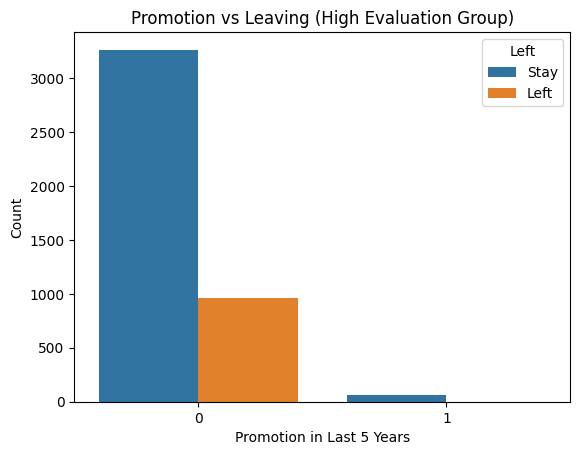

In [120]:
sns.countplot(data=df_high_eval, x='promotion_last_5years', hue='left')
plt.title('Promotion vs Leaving (High Evaluation Group)')
plt.xlabel('Promotion in Last 5 Years')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Stay', 'Left'])
plt.show()

High-performing employees who left the company often did not receive a promotion in the last five years. 

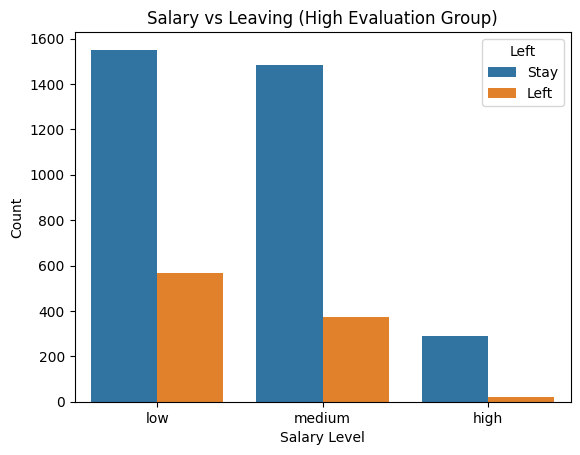

In [121]:
sns.countplot(data=df_high_eval, x='salary', hue='left', order=['low', 'medium', 'high'])
plt.title('Salary vs Leaving (High Evaluation Group)')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Stay', 'Left'])
plt.show()

High-performing employees who left the company were consistently paid low or medium salaries. 

Insight for this:

Employees with high evaluation scores who experienced both high workload and insufficient rewards (e.g., low salary or no promotion) were more likely to leave the company.

### 2.3.4 Checking the 'Monthly Hours working' and 'Left' Variables

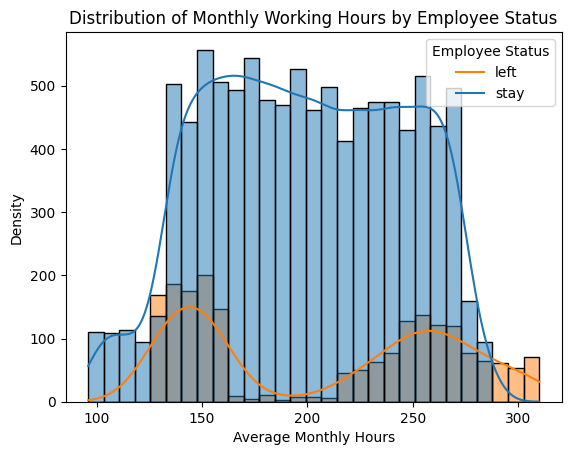

In [122]:
plt.Figure(figsize=(10, 5))
sns.histplot(data=df1, x='average_montly_hours', hue='left', kde=True)
plt.title('Distribution of Monthly Working Hours by Employee Status')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Density')
plt.legend(title='Employee Status', loc='upper right', labels=['left','stay'])
plt.show()

Employees who work between 130–160 hours and those who work between 230–280 hours per month tend to show a higher intent to leave the company

Create correlation

In [123]:
df1["salary_d"] = df1["salary"].replace({'low':0,'medium':1,'high':2})
df1["department_d"] = df1["Department"].replace({'sales':1, 'technical':2,'support':3,'IT':4,'RandD':5,'product_mng':6,'marketing':7,'accounting':8,'hr':9,'management':10})
     

C:\Users\ACER\AppData\Local\Temp\ipykernel_73464\2334541143.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["salary_d"] = df1["salary"].replace({'low':0,'medium':1,'high':2})
C:\Users\ACER\AppData\Local\Temp\ipykernel_73464\2334541143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["salary_d"] = df1["salary"].replace({'low':0,'medium':1,'high':2})
C:\Users\ACER\AppData\Local\Temp\ipykernel_73464\2334541143.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a futu

In [124]:
df1 = df1.drop(columns=["salary","Department"])
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_d,department_d
0,0.38,0.53,2,157,3,0,1,0,0,1
1,0.80,0.86,5,262,6,0,1,0,1,1
2,0.11,0.88,7,272,4,0,1,0,1,1
3,0.72,0.87,5,223,5,0,1,0,0,1
4,0.37,0.52,2,159,3,0,1,0,0,1


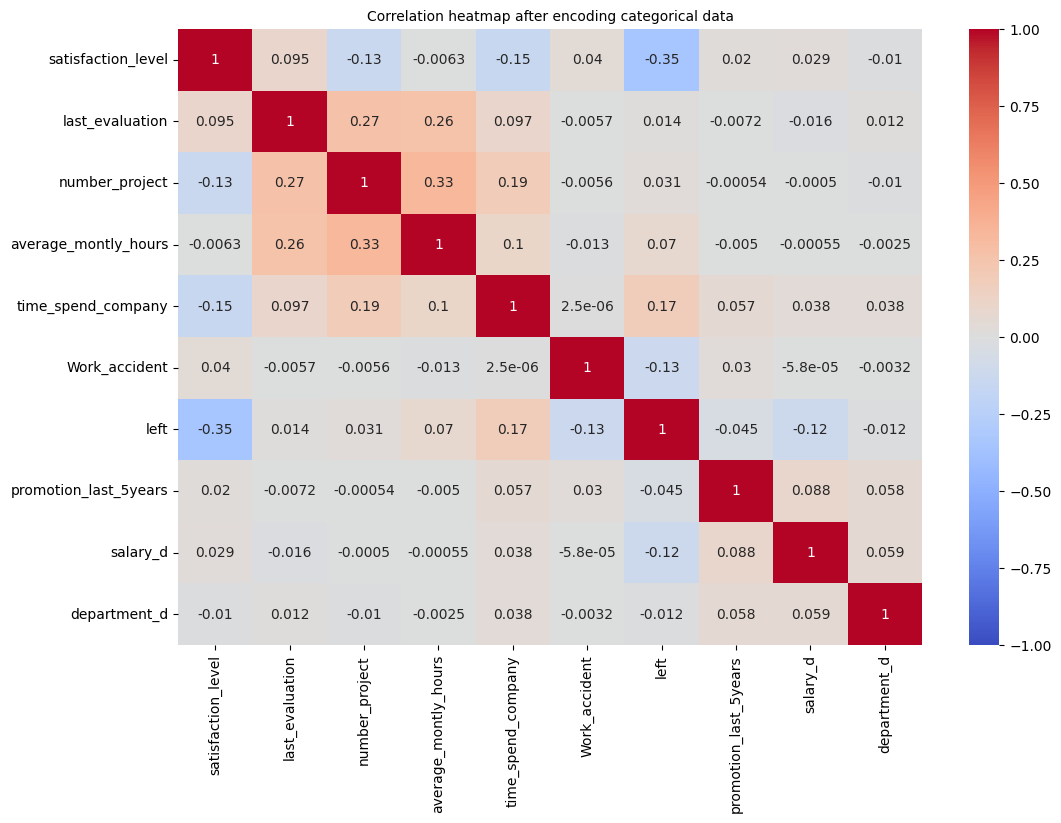

In [125]:

# Calculate correlation and plot heatmap
plt.figure(figsize=(12,8))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap after encoding categorical data', fontsize=10)
plt.show()

Remove outliers to watch value

In [126]:
df1= df1[df1["time_spend_company"]<6]
df1.describe()
     

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_d,department_d
count,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000,11167.000000
mean,0.631944,0.715901,3.786066,200.144533,3.109161,0.152413,0.168532,0.014417,0.592997,3.658279
std,0.239064,0.167595,1.164198,48.563047,0.899277,0.359437,0.374355,0.119209,0.632227,2.695848
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.490000,0.570000,3.000000,157.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.660000,0.720000,4.000000,199.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,1.000000,5.000000
max,1.000000,1.000000,7.000000,310.000000,5.000000,1.000000,1.000000,1.000000,2.000000,10.000000


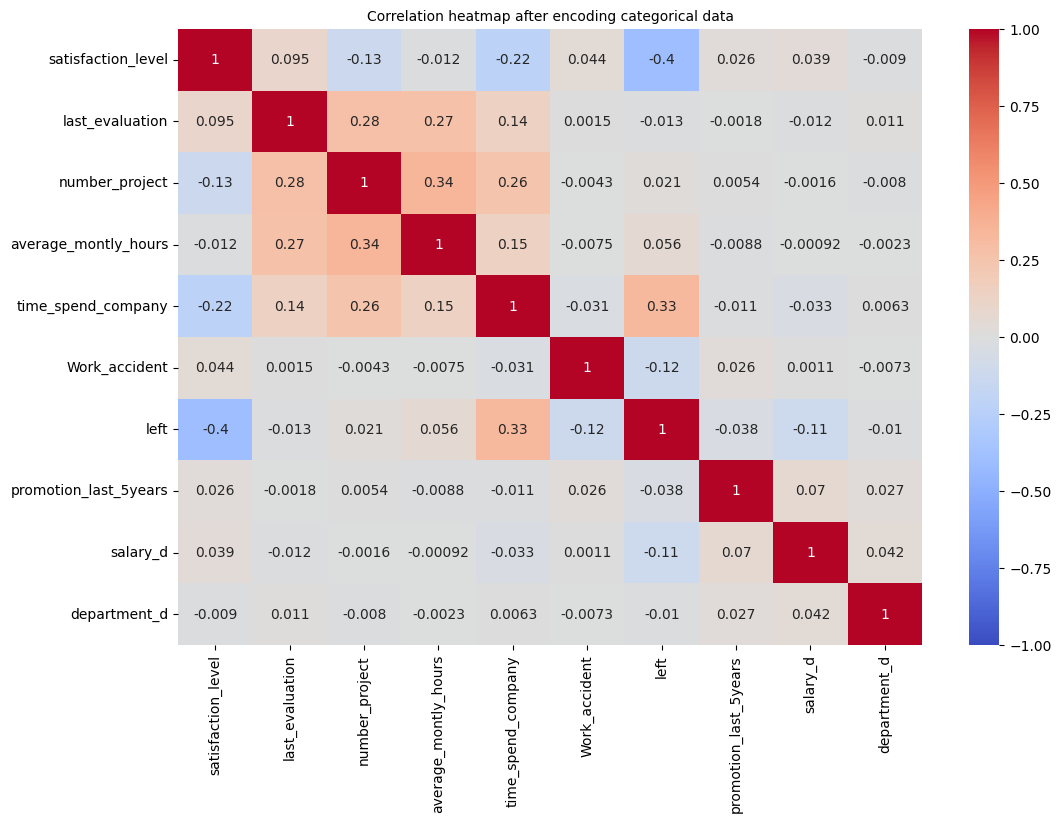

In [127]:
# Calculate correlation and plot heatmap
plt.figure(figsize=(12,8))
corr_matrix = df1.corr(method='pearson')
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap after encoding categorical data', fontsize=10)
plt.show()

Insight about correlation:

Satisfaction_level is impacted Negatively by Number_project, time spend company and left

Number of project is impacted negatively by Satisfaction_level, salary





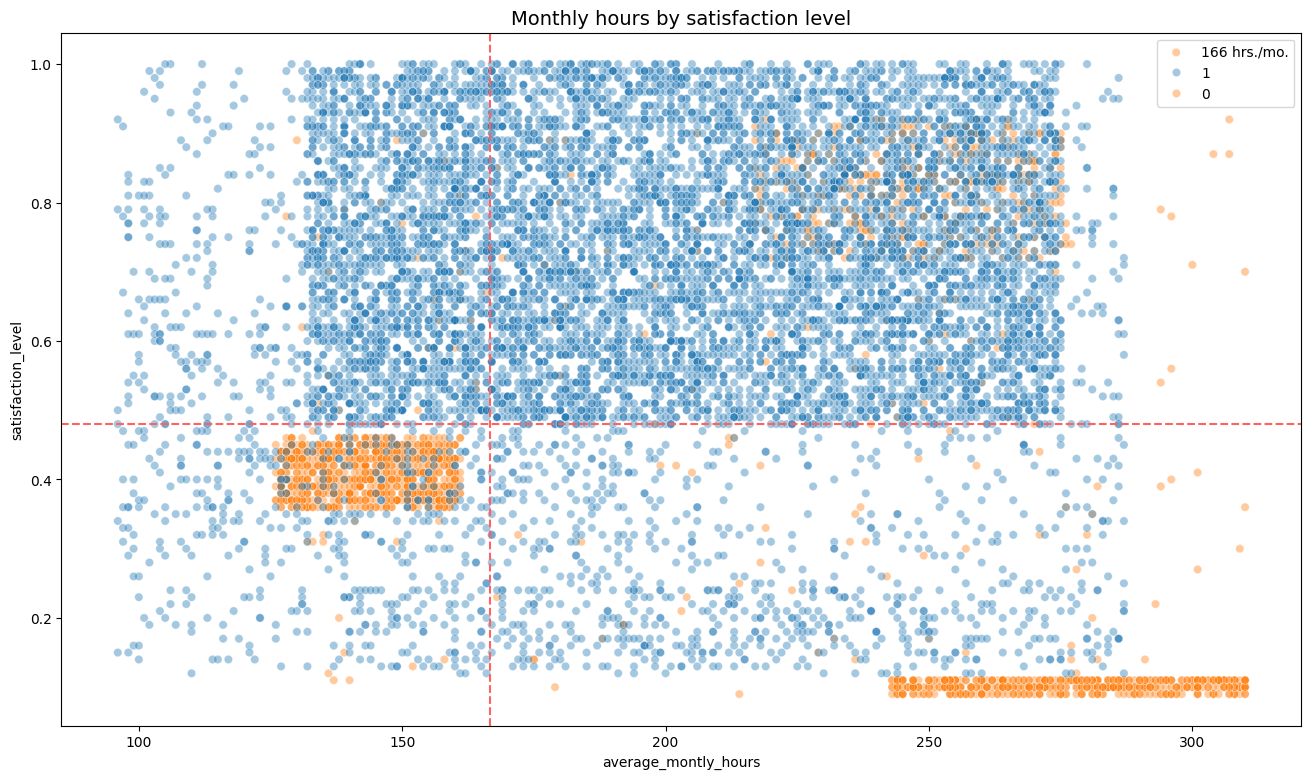

In [128]:
plt.figure(figsize=(16, 9))
sns.scatterplot(df1, x='average_montly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166 hrs./mo.', ls='--')
plt.axhline(y=0.48, color='#ff6361', label='Specific Satisfaction Level', ls='--')
plt.legend(labels=['166 hrs./mo.', '1', '0'])
plt.title('Monthly hours by satisfaction level', fontsize='14');

# 3. Hypothesis testing

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_d,department_d
0,0.38,0.53,2,157,3,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,1,1
3,0.72,0.87,5,223,5,0,1,0,0,1
4,0.37,0.52,2,159,3,0,1,0,0,1
5,0.41,0.50,2,153,3,0,1,0,0,1


In [129]:
df1.groupby('salary_d')['left'].describe()

,count,mean,std,min,25%,50%,75%,max
salary_d,,,,,,,,
0,5429.0,0.203905,0.402936,0.0,0.0,0.0,0.0,1.0
1,4854.0,0.149773,0.356886,0.0,0.0,0.0,0.0,1.0
2,884.0,0.054299,0.226734,0.0,0.0,0.0,0.0,1.0


When i follow the insight, i'm curious about Promotion vs. Attrition that . so i decide to use Hypothesis testing with:
- Null Hypothesis: Employees who were promoted

- Alternative Hypothesis: Employees who were not promoted


In [142]:
# Number of people who left in each group
left_counts = [0, 110]

# Total number in each group
total_counts = [41, 783]

# Perform the z-test for proportions
z_stat, p_value = sm.stats.proportions_ztest(count=left_counts, nobs=total_counts)

print("Z-statistic:", z_stat)
print("P-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in attrition rates.")
else:
    print("Fail to reject the null hypothesis: No significant difference in attrition rates.")

# Check p-value
if p_value < 0.05:
    print("There is a significant difference in attrition rates between the two groups.")

Z-statistic: -2.5782313794916147
P-value: 0.009930747729496038
Reject the null hypothesis: There is a significant difference in attrition rates.
There is a significant difference in attrition rates between the two groups.


I want to make a test for Salary and Attrition so i decide to use Hypothesis testing 

Hypotheses for Two-Tailed Test:
- H₀ (Null Hypothesis): The proportion of attrition is equal between the two groups (p₁ = p₂)

- H₁ (Alternative Hypothesis): The proportions are not equal (p₁ ≠ p₂)

In [141]:
# Input data
x1 = 1174  # Number of low salary employees who left
n1 = 5740  # Total low salary employees

x2 = 769  # Number of medium salary employees who left
n2 = 5261  # Total medium salary employees

# Combine data
count = [x1, x2]
nobs = [n1, n2]

# Perform 1-tailed z-test for proportions (H1: p1 > p2)
zstat, pval = proportions_ztest(count, nobs, alternative='two-sided')

print(f"Z-statistic: {zstat:.4f}")
print(f"P-value: {pval:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in attrition rates.")
else:
    print("Fail to reject the null hypothesis: No significant difference in attrition rates.")

if p_value < 0.05:
    print("There is a significant difference in attrition rates between the two groups.")
else:
    print("No significant difference in attrition rates between the two groups.")



Z-statistic: 8.0180
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in attrition rates.
There is a significant difference in attrition rates between the two groups.


# 4. Conclude

## 4.1 Insight:
### 4.1.1: Insights about outliers

- Outliers only 2.04%, so it doesn’t have a significant impact on the data.   

### 4.1.2: Insights about "Department" and "Left". 

- Almost people in Sales, Technical, Support spend a lot of time in company but the salary is still 

#### I figure out that 3 departments have the highest attribution so i dig deeper into it.
#### 4.1.2.1: Insights about "Department" and "Salary"

- 20% of all employees with low salaries and 14.6% of all employees with medium salaries left the company.

#### 4.1.2.2: Insight about 'Department' and 'Average_monthly_hours' 

- Employees in the Sales, Technical, and Support departments tend to work longer hours.

#### 4.1.2.3: Insight about "department" and "Promotion_last_5years"
- Of 824 employees with over 5 years at the company, only 5% were promoted. Among the 783 not promoted, 14% left, while 100% of promoted employees stayed.

#### 4.1.2.4: Insight about "department" and "Number_project"

- The Sales department consistently handles the most projects, averaging 3.67%–10.61% more than the second-highest team.

- Employees with low salaries and more than 5 projects have a very high turnover (left rate). These employees also spend more years at the company, but still leave at a high rate → suggesting possible burnout or underpayment.

### 4.1.3: Insight about 'Satisfaction_level' and 'Left'

- Satisfaction_level is lower, Employees tend to left the company

### 4.1.4: Insight about 'Last_evaluation' and 'Left'

- Last evaluation is lower than 0.6 make employees tend to left the company

### But i figure out Last evaluation is greater than 0.8 still make employees tend to left the company ? so i dig deeper and have a insight:
### 4.1.4.1:

- Employees with high evaluation scores who experienced both high workload and insufficient rewards (e.g., low salary or no promotion) were more likely to leave the company.

### 4.1.5: Insight about "Average_monthly_ hours" and "Left"

- Employees who work between 130–160 hours and those who work between 230–280 hours per month tend to show a higher intent to leave the company

### 4.1.6: Insight about correlation

- Satisfaction_level is impacted Negatively by Number_project, time spend company and left. Number of project is impacted negatively by Satisfaction_level, salary

### 4.1.7: Result of the hypothesis testing

- The results of the hypothesis testing: With z-scores of -2.58 for promotion and 8.02 for salary, both values fall within the rejection regions of the standard normal distribution. Therefore, we reject the null hypotheses for both cases. The corresponding p-values of 0.009 (promotion) and < 0.0001 (salary) are both less than the significance level of 0.05. These results provide strong statistical evidence of significant differences in attrition rates related to promotion status and salary level.

## 4.2 Proposal
- Review salary, especially for high-performing and long-tenure employees.

- Recognize and promote employees who have spent many years and contributed significantly.

- Rebalance workloads, particularly in the Sales department.

- Monitor working hours to avoid burnout, especially in extremes.

- Employees with last evaluation > 0.8 should be prioritized for rewards or stretch assignments.

- Track promotion eligibility for employees with >3 years of service.

- Cap the number of high-stress projects per employee (e.g., max 5 projects/month).
